Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Nicolás Guarín-Zapata 2026.

# Mejor aproximación

In [1]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [4]:
sym.init_session()

IPython console for SymPy 1.14.0 (Python 3.11.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.14.0/



## Mejor aproximación en el plano

Supongamos que tenemos un vector $\mathbf{f} = (3, 5)$
y queremos encontrar el vector que mejor lo aproxima 
a lo largo del vector $\boldsymbol{\psi}_0 = (a, b)$, como se muestra
en la figura.

<img src="img/aprox_plano.svg">


Si consideramos el espacio vectorial $V$,

$$V = \mathrm{span}\{\boldsymbol{\psi}_0\}\, ,$$

podemos decir que $\psi_0$ es un vector base del
espacio. Lo que queremos es encontrar el vector

$$\mathbf{u} = c_0 \boldsymbol{\psi}_0 \in V\, $$

que mejor aproxima $\mathbf{f}$.

Esto podemos hacerlo usando:

- el método de mínimos cuadrados;

- el método de proyección.

### Método de mínimos cuadrados

En este caso formamos un sistema de ecuaciones
mínimizando el error cuadrático medio entre
el vector original y una combinación lineal de la base

$$\min_{c_0} E\, ,$$

donde

$$E = \langle\mathbf{e}, \mathbf{e}\rangle = \Vert \mathbf{e}\Vert^2 =
\langle\mathbf{f} - c_0\boldsymbol{\psi}_0,
\mathbf{f} - c_0\boldsymbol{\psi}_0\rangle\, $$

Esto lo logramos haciendo

$$\frac{\partial E}{\partial c_0} = 0\, $$

como se muestra a continuación.

In [5]:
a, b, c0 = sym.symbols("a b c0")
f = sym.Matrix([3, 5])
psi = sym.Matrix([a, b])

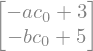

In [6]:
e = f - c0*psi
e

In [7]:
E = e.dot(e)
E

In [8]:
eq = sym.diff(E, c0)
eq

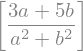

In [9]:
sym.solve(eq, c0)

### Método de proyección

En este caso la aproximación está dada por la condición
de que el error sea ortogonal al espacio
generado, es decir,

$$\langle\mathbf{e}, \mathbf{v}\rangle = 0\quad \forall v \in V\, .$$

En este caso, esto se reduce a

$$\langle\mathbf{e}, \boldsymbol{\psi}_0\rangle = 0\, ,$$

como vemos a continuación.

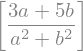

In [10]:
sym.solve(e.dot(psi), c0)

En el caso de aproximación de vectores en espacios
vectoriales estos dos métodos nos llevan al mismo
resultado.

## Aproximación para vectores generales

En este caso tenemos que

In [11]:
def minimos_cuadrados(vector, base):
    n = len(base)
    c = sym.symbols("c0:%d" % n)
    span = sym.zeros(vector.shape[0], vector.shape[1])
    for k in range(n):
        span = span + c[k] * base[k]

    e = vector - span
    E = e.dot(e)
    eqs = []
    for k in range(n):
        eqs.append(sym.diff(E, c[k]))

    sol = sym.solve(eqs, c)
    vals = list(sol.values())
    vector_ap = sym.zeros(vector.shape[0], vector.shape[1])
    for k in range(n):
        vector_ap = vector_ap + vals[k]*base[k]
    
    return vector_ap

In [12]:
vector = sym.Matrix([1, 2, 4])
base = (sym.Matrix([1, 0, 0]),
        sym.Matrix([0, 1, 0]))

In [13]:
vector_ap = minimos_cuadrados(vector, base)
vector_ap

Podemos verificar la ortogonalidad que mencionamos anteriormente.

In [14]:
(vector - vector_ap).dot(vector_ap)